In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt
import math
import os
import glob
import seaborn as sns; sns.set()

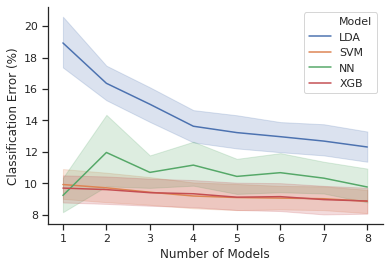

In [ ]:
## Phase Dependency Figure
raw_dir = "/content/drive/My Drive/ML Data/Offline Mode Classification Result/"
data_path = raw_dir + "phase dependency result.xlsx"
result = pd.read_excel(data_path, header=0)
image = sns.lineplot(x="Number of Models", y ="Classification Error (%)", hue = "Model", ci=95 ,data = result)
sns.set(style="white", context="talk", palette="deep")
sns.set(style="ticks")
sns.despine()

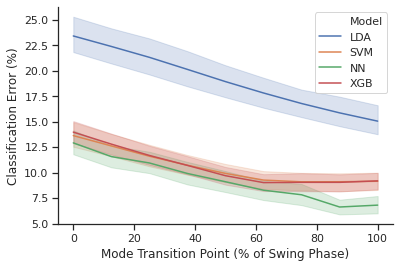

In [ ]:
## Phase Dependency Figure
raw_dir = "/content/drive/My Drive/ML Data/Offline Mode Classification Result/"
data_path = raw_dir + "transition point result.xlsx"
result = pd.read_excel(data_path, header=0)
image = sns.lineplot(x="Mode Transition Point (% of Swing Phase)", y ="Classification Error (%)", hue = "Model", ci=95 ,data = result)
sns.set(style="white", context="talk", palette="deep")
sns.set(style="ticks")
sns.despine()

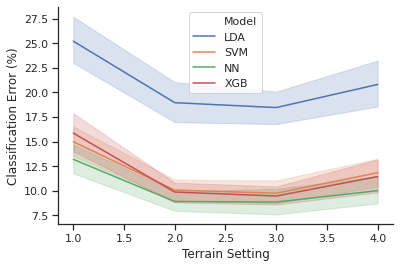

In [ ]:
## Phase Dependency Figure
raw_dir = "/content/drive/My Drive/ML Data/Offline Mode Classification Result/"
data_path = raw_dir + "incline exclusion result.xlsx"
result = pd.read_excel(data_path, header=0)
image = sns.lineplot(x="Terrain Setting", y ="Classification Error (%)", hue = "Model", ci=95 ,data = result)
sns.set(style="white", context="talk", palette="deep")
sns.set(style="ticks")
sns.despine()

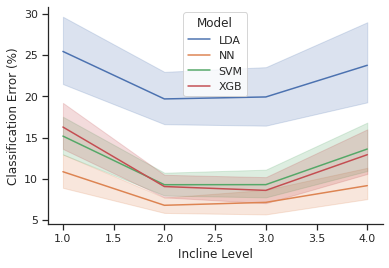

In [39]:
# leave ramp out figure
raw_dir = "/content/drive/My Drive/ML Data/Offline Mode Classification Result/ramp remove result/"

final_data = pd.DataFrame()
for model in ['LDA', 'NN', 'SVM', 'XGB']:
  result = pd.DataFrame()
  for incline in [1, 2, 3, 4]:
    data_path = raw_dir + model + "_ramp_remove" + str(incline) + ".txt"
    file = pd.read_csv(data_path, ' ',header=None)
    file.iloc[:, 2] = model
    file.iloc[:, 3] = incline
    file = file.iloc[:,2:5]
    result = result.append(file)
  final_data = final_data.append(result)

final_data.iloc[:,2] = (1-final_data.iloc[:,2])*100
header = {2:'Model',3:'Incline Level', 4:'Classification Error (%)'}
final_data.rename(columns=header, inplace=True)

image = sns.lineplot(x="Incline Level", y ="Classification Error (%)", hue = "Model", ci=95 ,data = final_data)
sns.set(style="white", context="talk", palette="deep")
sns.set(style="ticks")
sns.despine()

In [ ]:
## Saving Figure
image.figure.savefig(raw_dir+'myimage.svg', format='svg', dpi=1200)